# Non-parametric Statistics 
## Chapter 2: Kernel Density Estimation
### Univariate Kernels

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from scipy import stats

In [36]:
np.random.seed(123)

In [12]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap2/kernels")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/wuzm/UOEY4S2/nonparam-stats-proj/plots/chap2/kernels'

Here we plot some of the univariate kernels

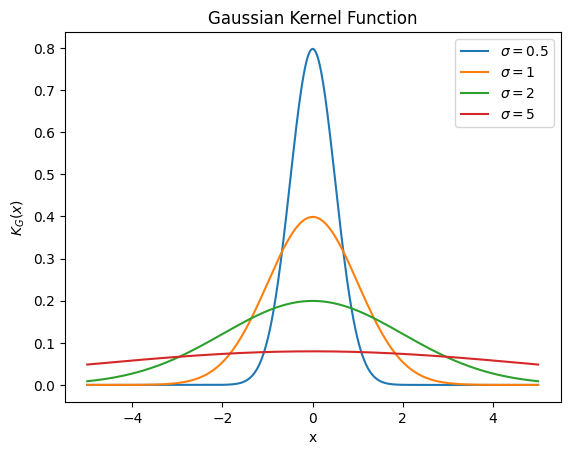

In [4]:

# Parameters for the Gaussian kernel
sd_values = [0.5, 1, 2, 5]
x = np.linspace(-5, 5, 1000)

# Gaussian kernel function
def gaussian_kernel(x, sigma=1):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(- (x ** 2) / (2 * sigma ** 2))

for sigma in sd_values:
    k = gaussian_kernel(x, sigma)
    plt.plot(x, k, label=f'$\sigma={sigma}$')

plt.xlabel('x')
plt.ylabel('$K_G(x)$')
plt.title('Gaussian Kernel Function')
plt.legend()

plt.savefig(os.path.join(plots_folder, 'univariate_gaussian_kernel.png'))
plt.show()


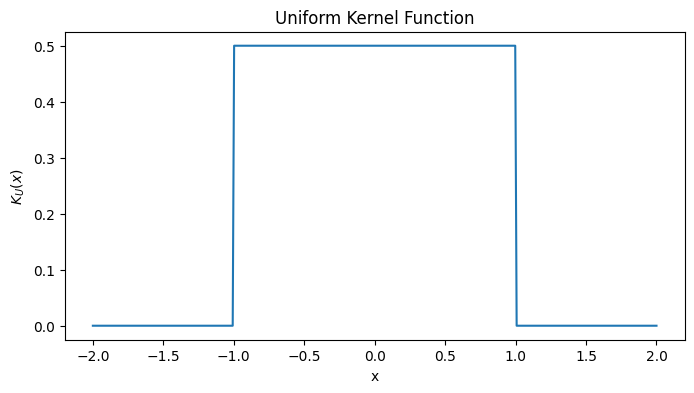

In [5]:
# Uniform kernel function
def uniform_kernel(u):
    return np.where(np.abs(u) <= 1, 0.5, 0)

x = np.linspace(-2, 2, 400)

kernel_values = uniform_kernel(x)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, kernel_values, label="Uniform Kernel")
plt.xlabel("x")
plt.ylabel("$K_U(x)$")
plt.title("Uniform Kernel Function")
#plt.legend()

plt.savefig(os.path.join(plots_folder, 'univariate_uniform_kernel.png'))
plt.show()


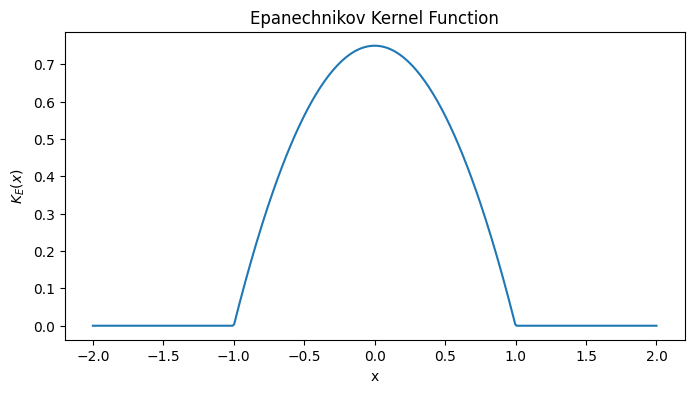

In [6]:
# Epanechnikov kernel function
def epanechnikov_kernel(x):
    return np.where(np.abs(x) <= 1, 0.75 * (1 - x**2), 0)

x = np.linspace(-2, 2, 400)
kernel_values = epanechnikov_kernel(x)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, kernel_values, label='Epanechnikov Kernel')
plt.xlabel("x")
plt.ylabel("$K_E(x)$")
plt.title('Epanechnikov Kernel Function')
#plt.legend()

plt.savefig(os.path.join(plots_folder, 'univariate_epanechnikov_kernel.png'))
plt.show()


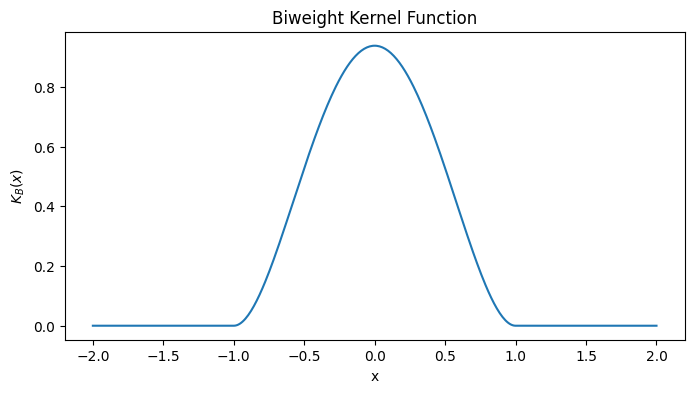

In [7]:

def biweight_kernel(x):
    return np.where(np.abs(x) <= 1, 15/16 * (1 - x**2)**2, 0)

kernel_values = biweight_kernel(x)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, kernel_values, label="Biweight Kernel")
plt.xlabel("x")
plt.ylabel("$K_B(x)$")
plt.title("Biweight Kernel Function")
#plt.legend()

plt.savefig(os.path.join(plots_folder, 'univariate_biweight_kernel.png'))
plt.show()



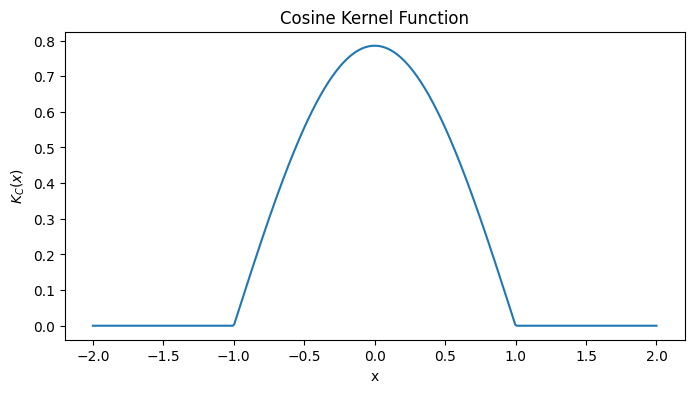

In [8]:

def cosine_kernel(x):
    return np.where(np.abs(x) <= 1, (np.pi / 4) * np.cos(np.pi * x / 2), 0)

kernel_values = cosine_kernel(x)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, kernel_values, label="Cosine Kernel")
plt.xlabel("x")
plt.ylabel("$K_C(x)$")
plt.title("Cosine Kernel Function")
#plt.legend()

plt.savefig(os.path.join(plots_folder, 'univariate_cosine_kernel.png'))
plt.show()

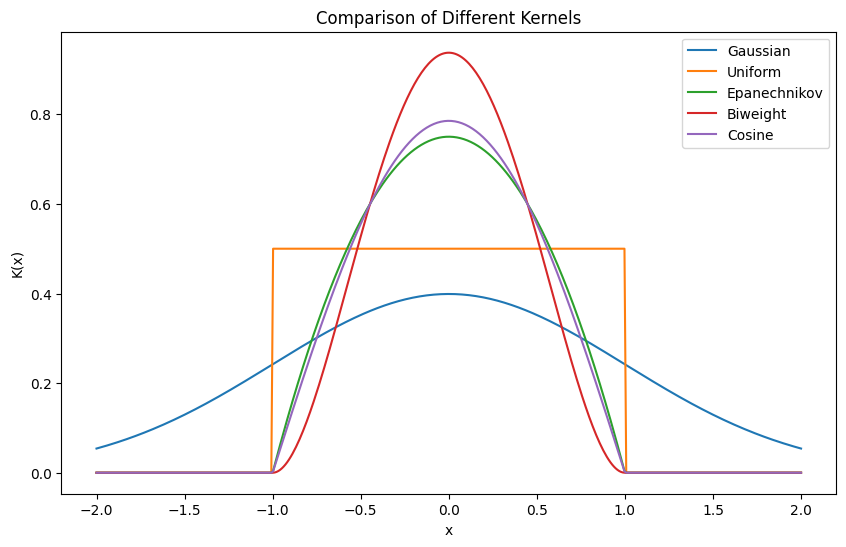

In [9]:
# ALL KERNELS IN ONE GO

x = np.linspace(-2, 2, 400)

# kernel values
gaussian_values = gaussian_kernel(x, 1)
uniform_values = uniform_kernel(x)
epanechnikov_values = epanechnikov_kernel(x)
biweight_values = biweight_kernel(x)
cosine_values = cosine_kernel(x)

# Plot the kernels
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian_values, label='Gaussian')
plt.plot(x, uniform_values, label='Uniform')
plt.plot(x, epanechnikov_values, label='Epanechnikov')
plt.plot(x, biweight_values, label='Biweight')
plt.plot(x, cosine_values, label='Cosine')

# Add title and legend
plt.title("Comparison of Different Kernels")
plt.xlabel("x")
plt.ylabel("K(x)")
plt.legend()

plt.savefig(os.path.join(plots_folder, 'univariate_all_kernel.png'))
plt.show()


Here we illustrate the effect of kernel on KDE with a fixed bandwidth 

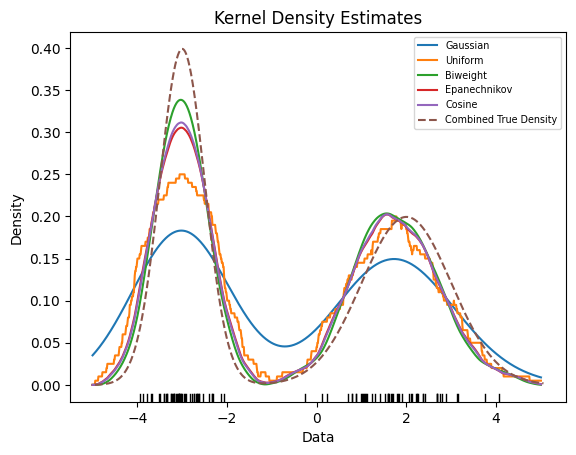

In [44]:
# Illustration of kde with different kernels

def custom_kde(data, kernel_func, bandwidth, x_grid):
    kde_values = np.zeros_like(x_grid)
    for xi in data:
        kde_values += kernel_func((x_grid - xi) / bandwidth)
    return kde_values / (len(data) * bandwidth)

# synthetic data: multimodal normal
data1 = np.random.normal(-3, 0.5, size=50)
data2 = np.random.normal(2, 1, size=50)
data = np.concatenate([data1, data2])
x = np.linspace(-5, 5, 1000)

# fixed bandwidth
bandwidth = 1

# True density 
x_values = np.linspace(min(data) - 1, max(data) + 1, 1000)
true_density1 = stats.norm.pdf(x_values, -3, 0.5) * (len(data1) / len(data))
true_density2 = stats.norm.pdf(x_values, 2, 1) * (len(data2) / len(data))

combined_density = true_density1 + true_density2

# KDE for each kernel
plt.plot(x, custom_kde(data, gaussian_kernel, bandwidth, x), label="Gaussian")
plt.plot(x, custom_kde(data, uniform_kernel, bandwidth, x), label="Uniform")
plt.plot(x, custom_kde(data, biweight_kernel, bandwidth, x), label="Biweight")
plt.plot(x, custom_kde(data, epanechnikov_kernel, bandwidth, x), label="Epanechnikov")
plt.plot(x, custom_kde(data, cosine_kernel, bandwidth, x), label="Cosine")

# Plot true density
plt.plot(x_values, combined_density, label='Combined True Density', linestyle='--')

# Plot data points at the bottom
for datapoint in data:
    plt.axvline(datapoint, ymin=0, ymax=0.02, color='k', linewidth=1)

plt.ylim(bottom=-0.02)
plt.legend(loc="upper right", fontsize="x-small")
plt.title("Kernel Density Estimates")
plt.xlabel("Data")
plt.ylabel("Density")

plt.savefig(os.path.join(plots_folder, "example-kde-all-kernels.png"))
plt.show()

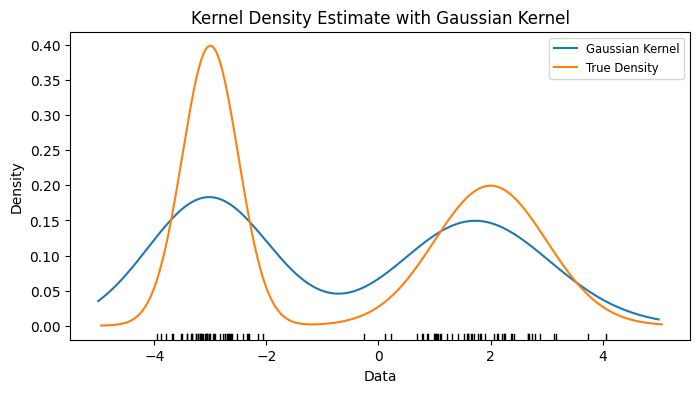

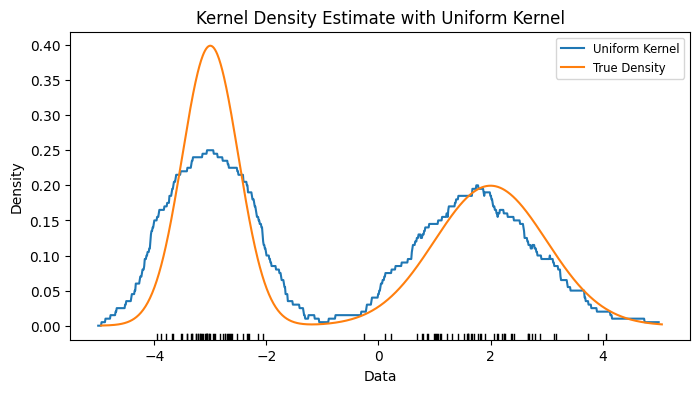

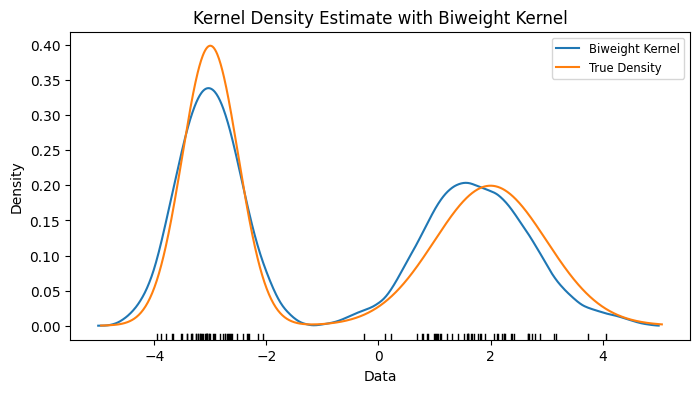

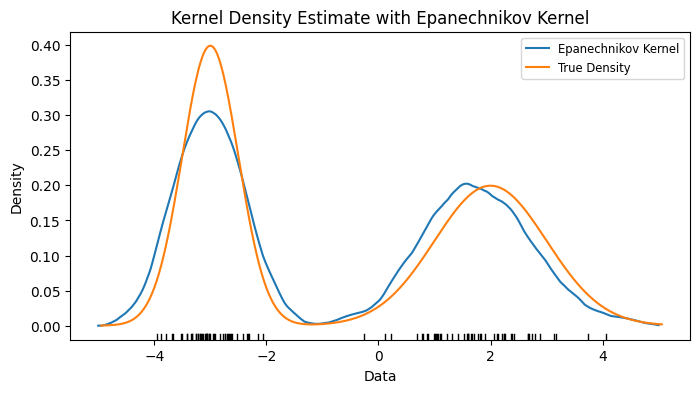

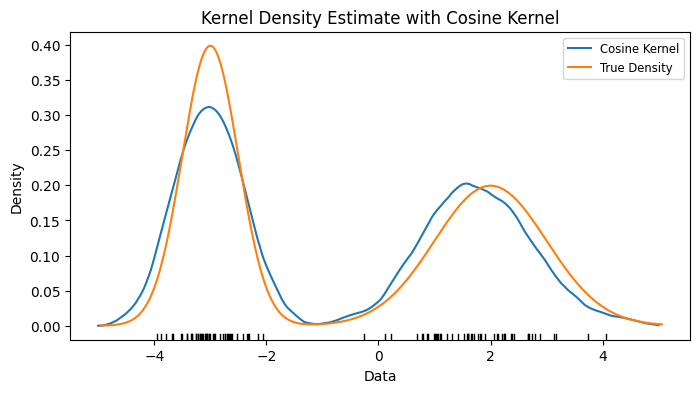

In [45]:
# Individual plots for clearer visualisaiton

kernels = [gaussian_kernel, uniform_kernel, biweight_kernel, epanechnikov_kernel, cosine_kernel]
kernel_names = ["Gaussian", "Uniform", "Biweight", "Epanechnikov", "Cosine"]


for kernel, name in zip(kernels, kernel_names):
    plt.figure(figsize=(8, 4))
    plt.plot(x, custom_kde(data, kernel, bandwidth, x), label=f'{name} Kernel')

    plt.plot(x_values, combined_density, label='True Density')

    for datapoint in data:
        plt.axvline(datapoint, ymin=0, ymax=0.02, color='k', linewidth=1)

    plt.ylim(bottom=-0.02)
    #plt.hist(data, bins=30, density=True, alpha=0.5, label='Data Histogram')
    plt.title(f'Kernel Density Estimate with {name} Kernel')
    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.legend(fontsize = "small")
    plt.savefig(os.path.join(plots_folder, f"example-{name}-kde.png"))

    
    plt.show()




Here we show the effect of bandwidth on KDE for each choice of kernel

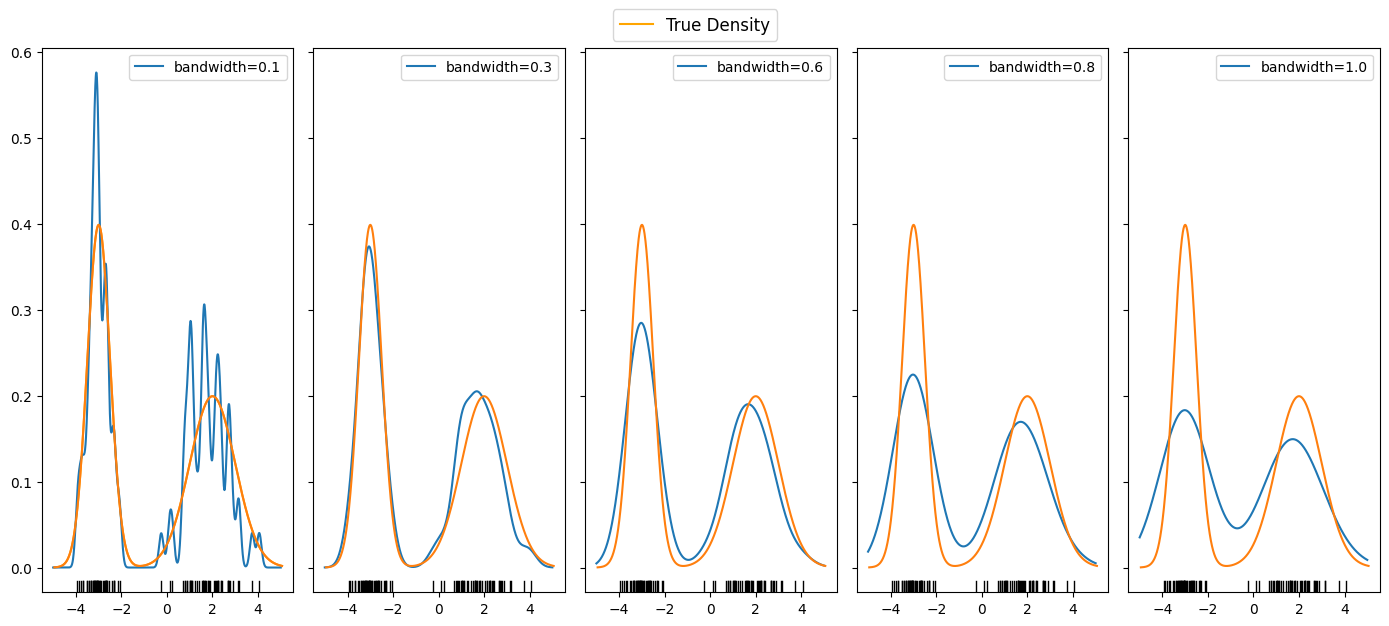

In [97]:
# Demonstration with different bandwidths for Gaussian Kernel

gaussian_bandwidth = np.linspace(0.1, 1, 5)

fig, ax = plt.subplots(1, 5, figsize=(14,6), sharex=True, sharey=True)

ax = ax.flatten()
true_density_line, = ax[0].plot(x_values, combined_density, label='True Density', color='orange')
bandwidth_legend_handles = []

for i, h in enumerate(gaussian_bandwidth):
    bandwidth_line, = ax[i].plot(x, custom_kde(data, gaussian_kernel, h, x), label=f'bandwidth={h:.1f}')
    ax[i].plot(x_values, combined_density)
    for datapoint in data:
        ax[i].axvline(datapoint, ymin=0, ymax=0.02, color='k', linewidth=1)

    bandwidth_legend_handles.append(bandwidth_line)
    ax[i].legend(handles=[bandwidth_line])

fig.legend(handles=[true_density_line], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=1, fontsize='large')
plt.tight_layout()

plt.savefig(os.path.join(plots_folder, f"gaussian-bandwidth-kde.png"), bbox_inches='tight')

plt.show()

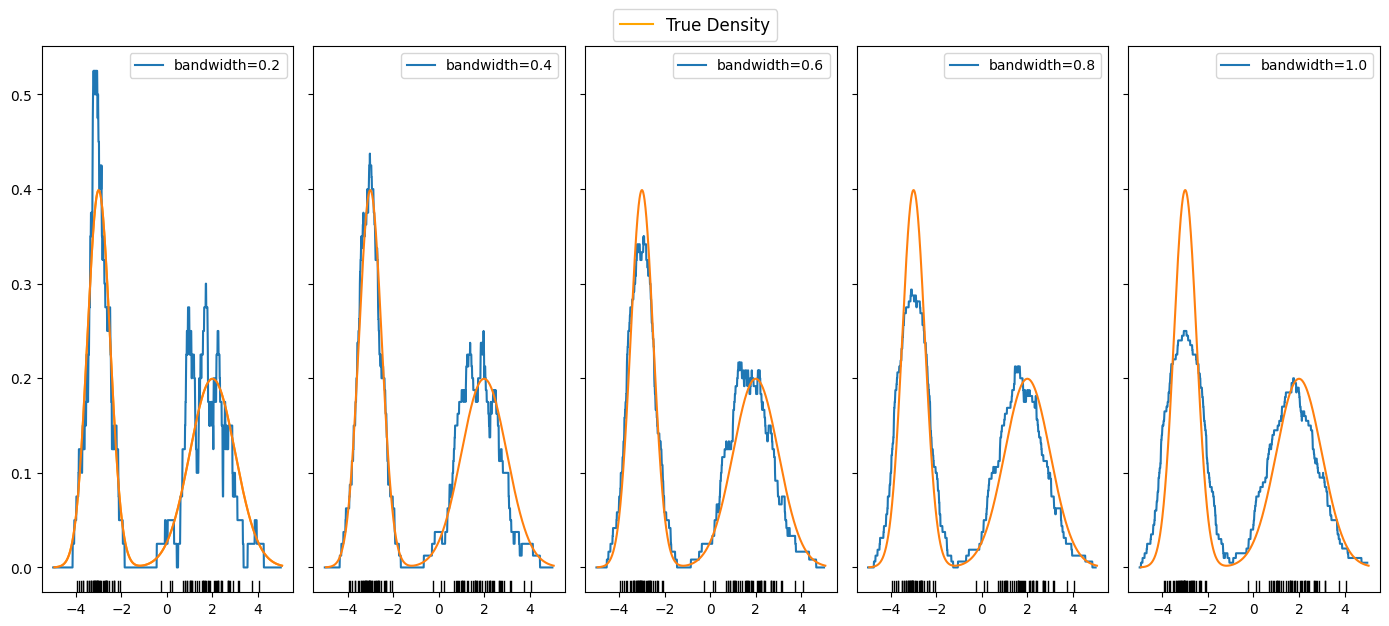

In [100]:
# Demonstration for uniform kernel
uniform_bandwidth = np.linspace(0.2, 1, 5)

fig, ax = plt.subplots(1, 5, figsize=(14,6), sharex=True, sharey=True)

ax = ax.flatten()
true_density_line, = ax[0].plot(x_values, combined_density, label='True Density', color='orange')
bandwidth_legend_handles = []

for i, h in enumerate(uniform_bandwidth):
    bandwidth_line, = ax[i].plot(x, custom_kde(data, uniform_kernel, h, x), label=f'bandwidth={h:.1f}')
    ax[i].plot(x_values, combined_density)
    for datapoint in data:
        ax[i].axvline(datapoint, ymin=0, ymax=0.02, color='k', linewidth=1)

    bandwidth_legend_handles.append(bandwidth_line)
    ax[i].legend(handles=[bandwidth_line])

fig.legend(handles=[true_density_line], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=1, fontsize='large')
plt.tight_layout()

plt.savefig(os.path.join(plots_folder, f"uniform-bandwidth-kde.png"), bbox_inches='tight')

plt.show()

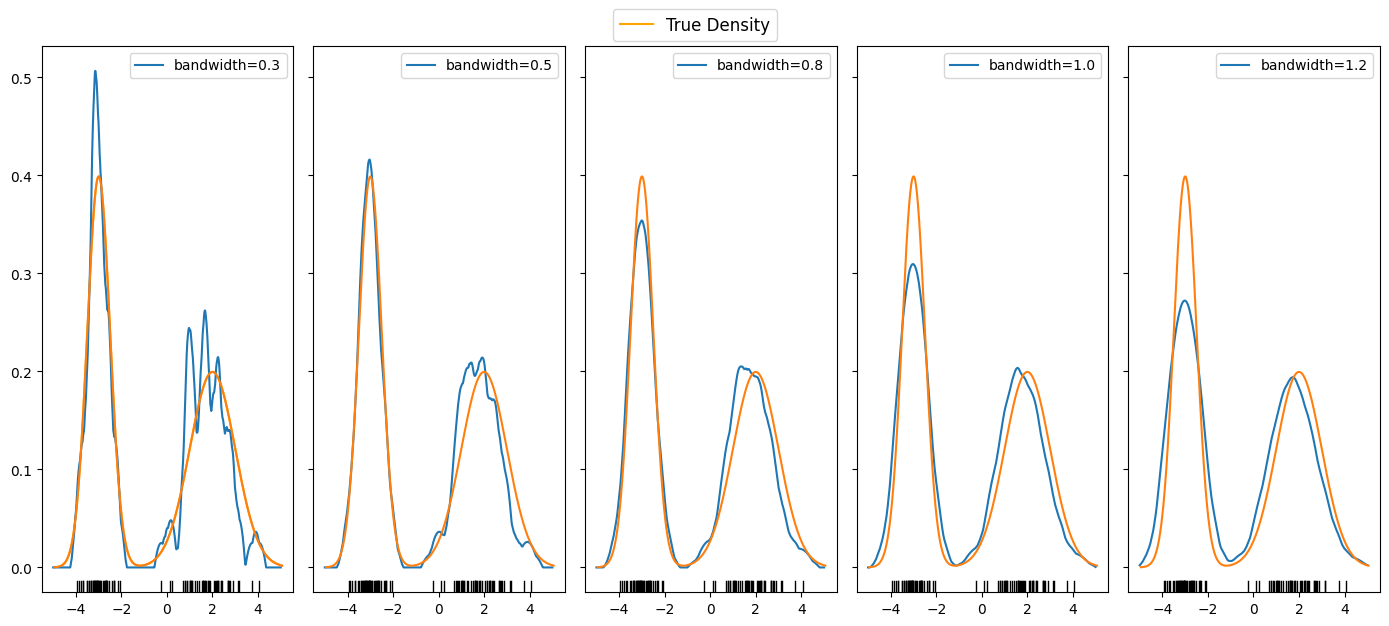

In [101]:
# Demonstration for epanechnikov kernel
epanechnikov_bandwidth = np.linspace(0.3, 1.2, 5)

fig, ax = plt.subplots(1, 5, figsize=(14,6), sharex=True, sharey=True)

ax = ax.flatten()
true_density_line, = ax[0].plot(x_values, combined_density, label='True Density', color='orange')
bandwidth_legend_handles = []

for i, h in enumerate(epanechnikov_bandwidth):
    bandwidth_line, = ax[i].plot(x, custom_kde(data, epanechnikov_kernel, h, x), label=f'bandwidth={h:.1f}')
    ax[i].plot(x_values, combined_density)
    for datapoint in data:
        ax[i].axvline(datapoint, ymin=0, ymax=0.02, color='k', linewidth=1)

    bandwidth_legend_handles.append(bandwidth_line)
    ax[i].legend(handles=[bandwidth_line])

fig.legend(handles=[true_density_line], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=1, fontsize='large')
plt.tight_layout()

plt.savefig(os.path.join(plots_folder, f"epanechnikov-bandwidth-kde.png"), bbox_inches='tight')

plt.show()